<a href="https://colab.research.google.com/github/estebanvz/deep_learning_series_temporales/blob/aula-5/Aula05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

# Dataset

In [ ]:
df_pasajeros = pd.read_csv("/content/alura-pasajeros.csv")
df_pasajeros.head()

,tiempo,pasajeros
0,2010.000000,112
1,2010.083333,118
2,2010.166667,132
3,2010.250000,129
4,2010.333333,121


In [ ]:
df_pasajeros.tail()

,tiempo,pasajeros
139,2021.583333,606
140,2021.666667,508
141,2021.750000,461
142,2021.833333,390
143,2021.916667,432


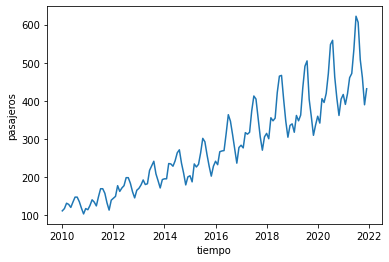

In [ ]:
sns.lineplot(data=df_pasajeros, x = "tiempo", y ="pasajeros")

In [ ]:
ss = StandardScaler()
dfn_pasajeros=ss.fit_transform(df_pasajeros)

In [ ]:
dfn_pasajeros[:5,:]

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593]])

In [ ]:
dfn_pasajeros[-5:,:]

array([[1.62383679, 2.72441656],
       [1.64789363, 1.9046693 ],
       [1.67195047, 1.5115252 ],
       [1.69600731, 0.91762667],
       [1.72006415, 1.26894693]])

In [ ]:
x = dfn_pasajeros[:,0]
y = dfn_pasajeros[:,1]

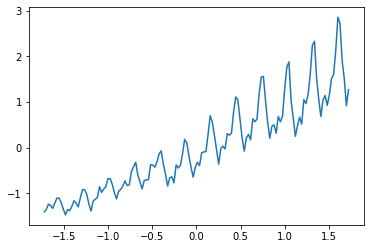

In [ ]:
sns.lineplot(x = x, y =y)

In [ ]:
split_n = int(0.9*len(x))
x_train = x[0:split_n]
x_test = x[split_n:]
y_train = y[0:split_n]
y_test = y[split_n:]
x_train.shape, y_test.shape

((129,), (15,))

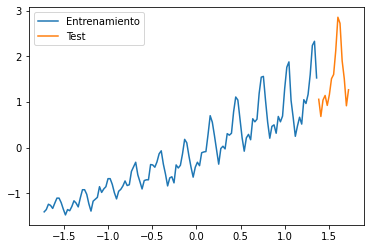

In [ ]:
sns.lineplot(x = x_train, y =y_train, label="Entrenamiento")
sns.lineplot(x = x_test, y =y_test, label="Test")

# Red Neuronal

In [ ]:
rn_lineal = Sequential()
rn_lineal.add( Dense(1, input_dim = 1, kernel_initializer = "ones", use_bias=True) )
rn_lineal.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
rn_lineal.fit(x_train,y_train)

5/5 [==============================] - 1s 4ms/step - loss: 0.1286


In [ ]:
y_predicted = rn_lineal.predict(x_train)
y_predicted.shape

(129, 1)

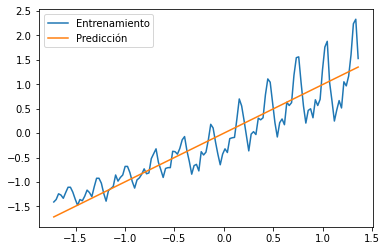

In [ ]:
sns.lineplot(x = x_train, y =y_train, label="Entrenamiento")
sns.lineplot(x = x_train, y =y_predicted.ravel(), label="Predicción")

In [ ]:
y_predicted_test = rn_lineal.predict(x_test)
y_predicted_test.shape

(15, 1)

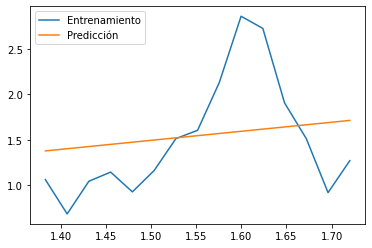

In [ ]:
sns.lineplot(x = x_test, y =y_test, label="Entrenamiento")
sns.lineplot(x = x_test, y =y_predicted_test.ravel(), label="Predicción")

## Transformación de datos

In [ ]:
def invertir_scala(tiempo,pasajeros,escalador):
  tmp = {"tiempo":tiempo,"pasajeros":pasajeros}
  df_tmp = pd.DataFrame(data=tmp)
  data_invertida = escalador.inverse_transform(df_tmp)
  df_final = pd.DataFrame(data_invertida)
  df_final.columns=["tiempo","pasajeros"]
  return df_final

In [ ]:
df_training = invertir_scala(x_train,y_predicted.ravel(), ss)
df_predicted = invertir_scala(x_test,y_predicted_test.ravel(), ss)

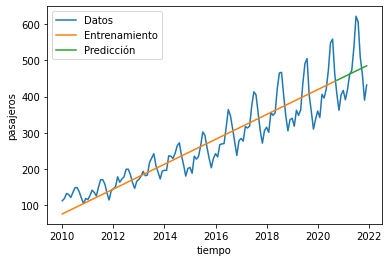

In [ ]:
sns.lineplot(data=df_pasajeros, x = "tiempo", y ="pasajeros", label="Datos")
sns.lineplot(data=df_training, x = "tiempo", y ="pasajeros", label="Entrenamiento")
sns.lineplot(data=df_predicted, x = "tiempo", y ="pasajeros", label="Predicción")

# Red Neuronal Compleja

In [ ]:
rn = Sequential()
rn.add( Dense(8, input_dim = 1) )
rn.add( Dense(8) )
rn.add( Dense(1) )
rn.compile(loss="mean_squared_error", optimizer="adam")
rn.fit(x_train,y_train, epochs=100)
y_predicted = rn.predict(x_train)
y_predicted_test = rn.predict(x_test)
df_training = invertir_scala(x_train,y_predicted.ravel(), ss)
df_predicted = invertir_scala(x_test,y_predicted_test.ravel(), ss)

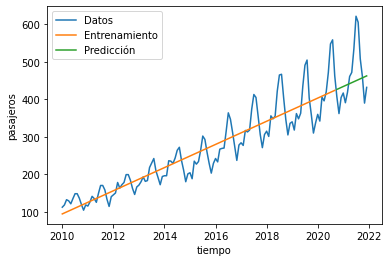

In [ ]:
sns.lineplot(data=df_pasajeros, x = "tiempo", y ="pasajeros", label="Datos")
sns.lineplot(data=df_training, x = "tiempo", y ="pasajeros", label="Entrenamiento")
sns.lineplot(data=df_predicted, x = "tiempo", y ="pasajeros", label="Predicción")

In [ ]:
rn_relu = Sequential()
rn_relu.add( Dense(8, input_dim = 1, activation="relu") )
rn_relu.add( Dense(8, activation="relu") )
rn_relu.add( Dense(1) )
rn_relu.compile(loss="mean_squared_error", optimizer="adam")
rn_relu.fit(x_train,y_train, epochs=100)
y_predicted = rn_relu.predict(x_train)
y_predicted_test = rn_relu.predict(x_test)
df_training = invertir_scala(x_train,y_predicted.ravel(), ss)
df_predicted = invertir_scala(x_test,y_predicted_test.ravel(), ss)

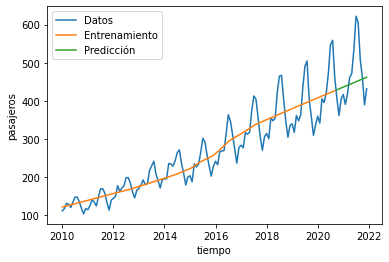

In [ ]:
sns.lineplot(data=df_pasajeros, x = "tiempo", y ="pasajeros", label="Datos")
sns.lineplot(data=df_training, x = "tiempo", y ="pasajeros", label="Entrenamiento")
sns.lineplot(data=df_predicted, x = "tiempo", y ="pasajeros", label="Predicción")

# Cambio de perspectiva

In [ ]:
def lag_variable(pasajeros,n_lag):
  x_train,y_train=[],[]
  for i in range(n_lag,len(pasajeros)):
    y_train.append(pasajeros[i])
    x_train.append(list(pasajeros[i-n_lag:i]))
  return x_train, y_train

In [ ]:
x_train_new,y_train_new = lag_variable(y_train,1)

In [ ]:
print(x_train_new[:5])
print(y_train_new[:5])

[[-1.4077788408280638], [-1.3575902326797062], [-1.2404834803335385], [-1.2655777844077172], [-1.3324959286055273]]
[-1.3575902326797062, -1.2404834803335385, -1.2655777844077172, -1.3324959286055273, -1.2153891762593596]


In [ ]:
rn_tanh = Sequential()
rn_tanh.add( Dense(8, input_dim = 1, activation="tanh") )
rn_tanh.add( Dense(8, activation="tanh") )
rn_tanh.add( Dense(1) )
rn_tanh.compile(loss="mean_squared_error", optimizer="adam")
rn_tanh.fit(x_train_new,y_train_new, epochs=100)
y_predicted_new = rn_tanh.predict(x_train_new)

In [ ]:
x_test_new,y_test_new = lag_variable(y_test,1)
y_predicted_test_new = rn_tanh.predict(x_test_new)

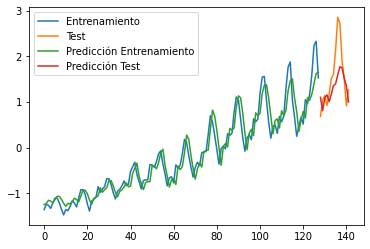

In [ ]:
rango1 = range(0,len(y_train_new))
rango2 = range(len(y_train_new),len(y_train_new)+len(y_test_new))
sns.lineplot(x=rango1, y=y_train_new,label="Entrenamiento")
sns.lineplot(x=rango2, y=y_test_new,label="Test")
sns.lineplot(x=rango1, y=y_predicted_new.ravel(),label="Predicción Entrenamiento")
sns.lineplot(x=rango2, y=y_predicted_test_new.ravel(),label="Predicción Test")

# Multiples Ventanas de Tiempo

In [ ]:
n_lag=3
x_train_new,y_train_new = lag_variable(y_train,n_lag)
rn_tanh = Sequential()
rn_tanh.add( Dense(8, input_dim = n_lag, activation="tanh") )
rn_tanh.add( Dense(64, activation="tanh") )
rn_tanh.add( Dense(1) )
rn_tanh.compile(loss="mean_squared_error", optimizer="adam")
rn_tanh.fit(x_train_new,y_train_new, epochs=200)
y_predicted_new = rn_tanh.predict(x_train_new)
x_test_new,y_test_new = lag_variable(y_test,n_lag)
y_predicted_test_new = rn_tanh.predict(x_test_new)

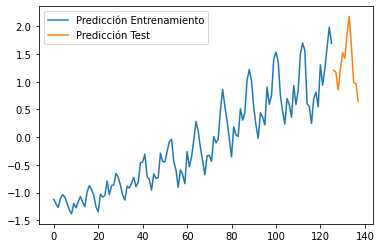

In [ ]:
rango1 = range(0,len(y_train_new))
rango2 = range(len(y_train_new),len(y_train_new)+len(y_test_new))
# sns.lineplot(x=rango1, y=y_train_new,label="Entrenamiento")
# sns.lineplot(x=rango2, y=y_test_new,label="Test")
sns.lineplot(x=rango1, y=y_predicted_new.ravel(),label="Predicción Entrenamiento")
sns.lineplot(x=rango2, y=y_predicted_test_new.ravel(),label="Predicción Test")

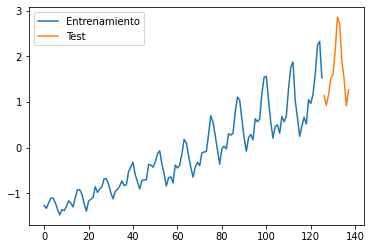

In [ ]:
sns.lineplot(x=rango1, y=y_train_new,label="Entrenamiento")
sns.lineplot(x=rango2, y=y_test_new,label="Test")

# Alura Bikes

In [ ]:
df_bicicletas=pd.read_csv("/content/alura-bicicletas.csv")
df_bicicletas.head()

,Fecha,Cantidad,Temperatura,sensacao,Humedad,Viento,Clima,Feriado,Fin_semana,Estación
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3


In [ ]:
df_bicicletas.tail()

,Fecha,Cantidad,Temperatura,sensacao,Humedad,Viento,Clima,Feriado,Fin_semana,Estación
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3,0,0,3
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4,0,0,3
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4,0,0,3
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4,0,0,3
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2,0,0,3


In [ ]:
df_bicicletas["Fecha"]=pd.to_datetime(df_bicicletas["Fecha"])

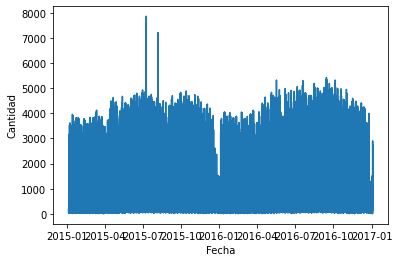

In [ ]:
sns.lineplot(data=df_bicicletas,x="Fecha",y="Cantidad")

In [ ]:
split = 0.8
rango = int(len(df_bicicletas)*split)
y_train = df_bicicletas["Cantidad"].iloc[:rango].values
y_test = df_bicicletas["Cantidad"].iloc[rango:].values

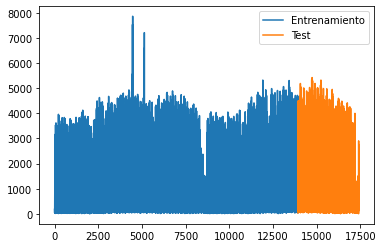

In [ ]:
sns.lineplot(x=range(0,rango),y=y_train,label="Entrenamiento")
sns.lineplot(x=range(rango,len(df_bicicletas)),y=y_test,label="Test")

In [ ]:
y_train.shape

(13931,)

In [ ]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_train.shape

(13931, 1)

In [ ]:
ss_bicicleta = StandardScaler()
y_train = ss_bicicleta.fit_transform(y_train)
y_test = ss_bicicleta.transform(y_test)

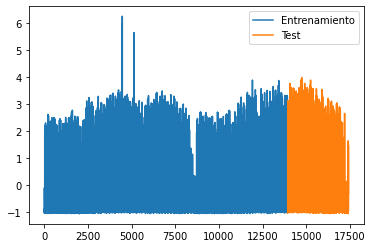

In [ ]:
sns.lineplot(x=range(0,rango),y=y_train.ravel(),label="Entrenamiento")
sns.lineplot(x=range(rango,len(df_bicicletas)),y=y_test.ravel(),label="Test")

In [ ]:
x_train_bike, y_train_bike = lag_variable(y_train.ravel(), 10 )
x_test_bike, y_test_bike = lag_variable(y_test.ravel(), 10 )

x_train_bike, y_train_bike = np.array(x_train_bike), np.array(y_train_bike)
x_test_bike, y_test_bike = np.array(x_test_bike), np.array(y_test_bike)

print(x_train_bike.shape,x_test_bike.shape,y_train_bike.shape,y_test_bike.shape)

(13921, 10) (3473, 10) (13921,) (3473,)


# Redes Neuronales Recurrentes

In [ ]:
x_train_bike = x_train_bike.reshape( -1, x_train_bike.shape[1], 1 )
print(x_train_bike.shape)

(13921, 10, 1)


In [ ]:
rnr = Sequential()
rnr.add ( SimpleRNN( 8,activation="tanh", input_shape=(x_train_bike.shape[1],x_train_bike.shape[2],) ) )
rnr.add ( Dense (1) )
rnr.compile(loss="mse",optimizer="adam")

In [ ]:
rnr.fit(x_train_bike,y_train_bike,epochs=20)

In [ ]:
y_predict_bike = rnr.predict(x_train_bike)

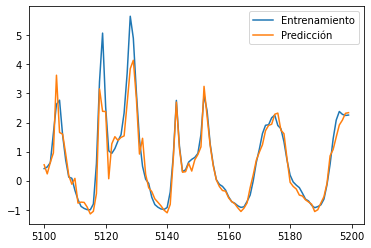

In [ ]:
rango_bike = (5100,5200)
rango_x = range(rango_bike[0],rango_bike[1])
rango_y = y_train_bike[rango_bike[0]:rango_bike[1]]
rango_y_predict = y_predict_bike.ravel()[rango_bike[0]:rango_bike[1]]
sns.lineplot(x=rango_x,y=rango_y,label="Entrenamiento")
sns.lineplot(x=rango_x,y=rango_y_predict,label="Predicción")

# Red Neuronal Recurrente LSTM

In [ ]:
rn_lstm = Sequential()
rn_lstm.add ( LSTM( 8,activation="tanh", input_shape=(x_train_bike.shape[1],x_train_bike.shape[2],) ) )
rn_lstm.add ( Dense (1) )
rn_lstm.compile(loss="mse",optimizer="adam")
rn_lstm.fit(x_train_bike,y_train_bike,epochs=20)

In [ ]:
y_predict_bike = rn_lstm.predict(x_train_bike)

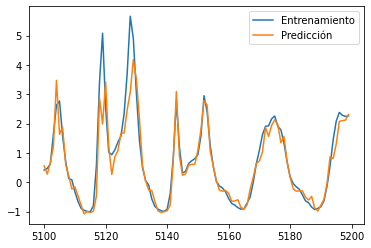

In [ ]:
rango_bike = (5100,5200)
rango_x = range(rango_bike[0],rango_bike[1])
rango_y = y_train_bike[rango_bike[0]:rango_bike[1]]
rango_y_predict = y_predict_bike.ravel()[rango_bike[0]:rango_bike[1]]
sns.lineplot(x=rango_x,y=rango_y,label="Entrenamiento")
sns.lineplot(x=rango_x,y=rango_y_predict,label="Predicción")

## Resultados de la RNN
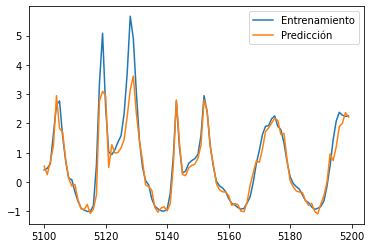

In [ ]:
print(x_test_bike.shape)
x_test_bike = x_test_bike.reshape( -1, x_test_bike.shape[1], 1 )
print(x_test_bike.shape)

(3473, 10)
(3473, 10, 1)


In [ ]:
y_predict_test_bike = rn_lstm.predict(x_test_bike)

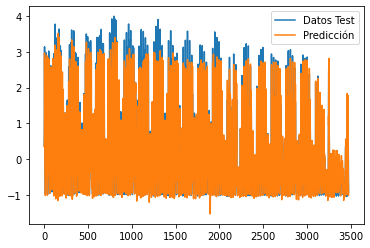

In [ ]:
sns.lineplot(x=range(0,len(y_predict_test_bike)),y=y_test_bike.ravel(),label="Datos Test")
sns.lineplot(x=range(0,len(y_predict_test_bike)),y=y_predict_test_bike.ravel(),label="Predicción")

#GRU y Overfitting

In [ ]:
rn_gru = Sequential()
rn_gru.add ( GRU( 8,activation="tanh", input_shape=(x_train_bike.shape[1],x_train_bike.shape[2],) ) )
rn_gru.add ( Dense (1) )
rn_gru.compile(loss="mse",optimizer="adam")
historia = rn_gru.fit(x_train_bike,y_train_bike,epochs=20, validation_data=(x_test_bike,y_test_bike))

Epoch 1/20
436/436 [==============================] - 5s 8ms/step - loss: 0.5218 - val_loss: 0.3405
Epoch 2/20
436/436 [==============================] - 3s 6ms/step - loss: 0.2159 - val_loss: 0.1741
Epoch 3/20
436/436 [==============================] - 3s 6ms/step - loss: 0.1296 - val_loss: 0.1272
Epoch 4/20
436/436 [==============================] - 3s 6ms/step - loss: 0.1052 - val_loss: 0.1088
Epoch 5/20
436/436 [==============================] - 3s 6ms/step - loss: 0.0923 - val_loss: 0.0926
Epoch 6/20
436/436 [==============================] - 3s 7ms/step - loss: 0.0816 - val_loss: 0.0773
Epoch 7/20
436/436 [==============================] - 3s 6ms/step - loss: 0.0722 - val_loss: 0.0671
Epoch 8/20
436/436 [==============================] - 4s 10ms/step - loss: 0.0657 - val_loss: 0.0629
Epoch 9/20
436/436 [==============================] - 4s 8ms/step - loss: 0.0608 - val_loss: 0.0577
Epoch 10/20
436/436 [==============================] - 3s 7ms/step - loss: 0.0567 - val_loss: 0.054

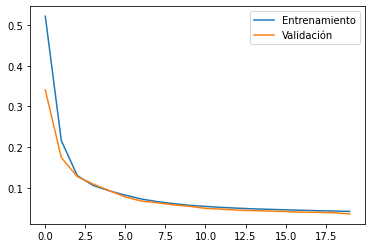

In [ ]:
sns.lineplot(data =historia.history["loss"] ,label="Entrenamiento")
sns.lineplot(data = historia.history["val_loss"],label="Validación")